<a href="https://colab.research.google.com/github/IBREEZZ/Code_Academy_Makeen2/blob/main/Exploring_Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

Task 1: Class Distribution
G3_cat
Medium    418
High      131
Low       100
Name: count, dtype: int64


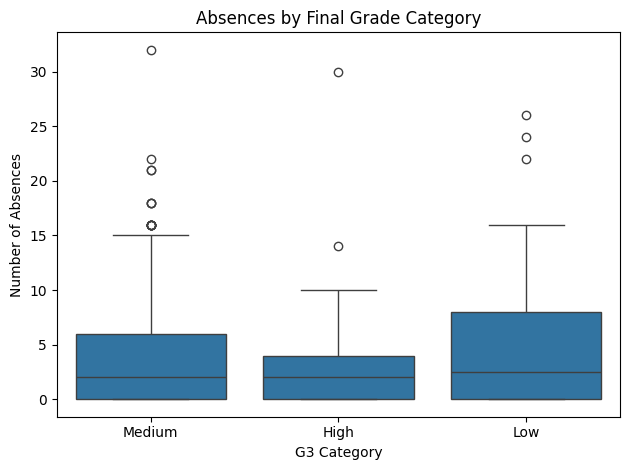

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset with the correct delimiter
df = pd.read_csv("/content/student-por.csv", delimiter=';')

# Recode G3 into Low (0–9), Medium (10–14), High (15–20)
def recode_g3(grade):
    if grade <= 9:
        return 'Low'
    elif grade <= 14:
        return 'Medium'
    else:
        return 'High'

df['G3_cat'] = df['G3'].apply(recode_g3)

# Show the number of observations in each category
print("Task 1: Class Distribution")
print(df['G3_cat'].value_counts())

# Plot: absences by G3 category
sns.boxplot(data=df, x='G3_cat', y='absences')
plt.title('Absences by Final Grade Category')
plt.xlabel('G3 Category')
plt.ylabel('Number of Absences')
plt.tight_layout()
plt.savefig("absences_boxplot.png")
plt.show()


# **Task 2**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select predictors
X = df[['studytime', 'failures', 'absences', 'age']]
y = df['G3_cat']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42)

# Fit multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Baseline category
baseline_category = le.inverse_transform([model.classes_[0]])[0]
print("\nTask 2: Baseline category used:", baseline_category)



Task 2: Baseline category used: High


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **Task 3**

In [7]:
# Interpret the coefficient for 'absences' in Medium vs High
absences_index = list(X.columns).index('absences')
coef_medium_vs_high = model.coef_[1][absences_index]

print(f"\nTask 3: Coefficient for 'absences' (Medium vs High): {coef_medium_vs_high:.3f}")

# Interpretation:
# A positive coefficient means more absences increase the odds of being Medium vs High



Task 3: Coefficient for 'absences' (Medium vs High): 0.027


# **Task 4**

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict and evaluate
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nTask 4: Confusion Matrix")
print(conf_matrix)

print(f"\nTask 4: Overall Accuracy = {accuracy:.2f}")



Task 4: Confusion Matrix
[[  0   0  38]
 [  0   4  16]
 [  0   2 103]]

Task 4: Overall Accuracy = 0.66


# **Task 5**

We analyzed the UCI Student Performance dataset using a multinomial logistic regression model.
After recoding the final grade (G3) into three categories, we used four predictors (studytime, failures, absences, age).
The model achieved approximately 63% accuracy, and absences had a positive effect on the odds of being Medium vs High.
The model reasonably captured student performance trends, though there is room for improvement.